# Giant Rats (AKA Rodents of Unusual Size)

The original code simulates breeding giant rats (or "Rodents of Unusual Size"), attempting to simulate the number of generations it would take to breed these rodents to the target size.

With this project, we have introduced an "error" variable to simulate errors in weighing the rodents. Perhaps the rodents squirmed while they were being weighed, or maybe the scale isn't quite correct. Whatever the reason, we are simulating weighing these rats with an error. We are using a random sample from a normal distribution with a width of `error`.

In [1]:
import numpy as np
import matplotlib.pyplot as plot

In [1]:
"""Use genetic algorithm to simulate breeding race of super rats."""

import time
import random
import statistics

# CONSTANTS (weights in grams)
GOAL = 50000
NUM_RATS = 20  # number of adult breeding rats in each generation
INITIAL_MIN_WT = 200
INITIAL_MAX_WT = 600
INITIAL_MODE_WT = 300
MUTATE_ODDS = 0.01
MUTATE_MIN = 0.5
MUTATE_MAX = 1.2
LITTER_SIZE = 8
LITTERS_PER_YEAR = 10
GENERATION_LIMIT = 5000

# ensure even-number of rats for breeding pairs:
if NUM_RATS % 2 != 0:
    NUM_RATS += 1

def populate(num_rats, min_wt, max_wt, mode_wt):
    """Initialize a population with a triangular distribution of weights."""
    return [int(random.triangular(min_wt, max_wt, mode_wt))
            for i in range(num_rats)]

def fitness(population, goal):
    """Measure population fitness based on an attribute mean vs target."""
    ave = statistics.mean(population)
    return ave / goal

def select(population, to_retain, error):
    """Cull a population to contain only a specified number of members."""
    # Create a dictionary with noisy weights as keys and actual weights as values
    # Compare with smaller or larger average errors - what's the number of generations to the goal when this is changed?
    noisy = {}
    for i in range(len(population)):
        epsilon = np.random.normal() * error
        noisy.update({population[i] + epsilon : population[i]})
    sorted_population = [noisy.get(z) for z in sorted(noisy)]
    # sorted_population = sorted(population)
    to_retain_by_sex = to_retain//2
    members_per_sex = len(sorted_population)//2
    females = sorted_population[:members_per_sex]
    males = sorted_population[members_per_sex:]
    selected_females = females[-to_retain_by_sex:]
    print(selected_females)
    selected_males = males[-to_retain_by_sex:]
    print(selected_males)
    return selected_males, selected_females

def breed(males, females, litter_size):
    """Crossover genes among members of a population."""
    random.shuffle(males)
    random.shuffle(females)
    children = []
    for male, female in zip(males, females):
        for child in range(litter_size):
            child = random.randint(female, male)
            children.append(child)
    return children

def mutate(children, mutate_odds, mutate_min, mutate_max):
    """Randomly alter rat weights using input odds & fractional changes."""
    for index, rat in enumerate(children):
        if mutate_odds >= random.random():
            children[index] = round(rat * random.uniform(mutate_min,
                                                         mutate_max))
    return children

def main():
    """Initialize population, select, breed, and mutate, display results."""
    generations = 0

    parents = populate(NUM_RATS, INITIAL_MIN_WT, INITIAL_MAX_WT,
                       INITIAL_MODE_WT)
    print("initial population weights = {}".format(parents))
    popl_fitness = fitness(parents, GOAL)
    print("initial population fitness = {}".format(popl_fitness))
    print("number to retain = {}".format(NUM_RATS))

    ave_wt = []

    while popl_fitness < 1 and generations < GENERATION_LIMIT:
        selected_males, selected_females = select(parents, NUM_RATS, 7)
        children = breed(selected_males, selected_females, LITTER_SIZE)
        children = mutate(children, MUTATE_ODDS, MUTATE_MIN, MUTATE_MAX)
        parents = selected_males + selected_females + children
        popl_fitness = fitness(parents, GOAL)
        print("Generation {} fitness = {:.4f}".format(generations,
                                                      popl_fitness))
        ave_wt.append(int(statistics.mean(parents)))
        generations += 1

    print("average weight per generation = {}".format(ave_wt))
    print("\nnumber of generations = {}".format(generations))
    print("number of years = {}".format(int(generations / LITTERS_PER_YEAR)))

if __name__ == '__main__':
    start_time = time.time()
    main()
    end_time = time.time()
    duration = end_time - start_time
    print("\nRuntime for this program was {} seconds.".format(duration))

initial population weights = [341, 422, 465, 273, 323, 338, 336, 387, 303, 355, 326, 271, 492, 297, 397, 409, 343, 346, 292, 435]
initial population fitness = 0.007151
number to retain = 20
[273, 271, 292, 303, 297, 336, 323, 326, 338, 341]
[343, 355, 346, 397, 387, 409, 422, 435, 465, 492]
Generation 0 fitness = 0.0071
[343, 332, 336, 346, 337, 336, 345, 337, 341, 355]
[423, 432, 424, 435, 442, 436, 433, 465, 489, 492]
Generation 1 fitness = 0.0079
[382, 381, 379, 384, 372, 377, 390, 389, 392, 373]
[436, 442, 456, 465, 465, 473, 474, 481, 489, 492]
Generation 2 fitness = 0.0085
[398, 407, 418, 421, 427, 417, 414, 419, 419, 418]
[484, 473, 481, 474, 479, 486, 489, 474, 492, 490]
Generation 3 fitness = 0.0090
[441, 438, 437, 447, 440, 446, 446, 448, 457, 453]
[481, 482, 492, 482, 489, 486, 481, 488, 486, 490]
Generation 4 fitness = 0.0093
[460, 448, 462, 470, 455, 467, 458, 468, 460, 468]
[490, 486, 480, 487, 490, 485, 488, 482, 478, 490]
Generation 5 fitness = 0.0094
[468, 467, 475, 47

ValueError: empty range for randrange() (477, 477, 0)

A curious thing happens: After a certain number of generations (this can have huge variance at error = 7---anywhere from 10 generations to 290 generations) the values of all of the weights of the rats become very similar. This means that the difference in mean weight between the males and the females of the group becomes practically identical, making it inevitable that eventually, a male rat and a female rat will be chosen where the female's weight will be equal to or greater than the male's. Python's random.randint() function does not take kindly to this, since the range must be greater than 0. This means I will have to modify the method to breed children as well.

As demonstrated below, the errors have to be rather large to make any difference. An error width of 10 has a very similar boxplot to an error width of 0, with the median at about 350 generations and the 25th and 75th percentile around 250 and 450 generations, respectively. However, an error width of 50 makes a rather large difference, moving the median to about 450 generations and increasing the spread of the data significantly (previously, the minimum and maximum values were about 200 generations apart, while here, the minimum and maximum values are about 300 generations apart.

The original experiment was limited to 500 generations, or 50 years, so I modified the algorithm to allow for 5000 generations. While this would be impractical for a mad scientist creating ROUS's within their lifetime, it does allow for demonstrating the difference that a larger error creates.

With an error width of 100, the median goes up to around 750, with the lowest number of generations near 400 and one of the highest outliers close to 1400.

In an attempt to figure out how big the error would have to be to make a difference, I ran another couple of tests with error = 25, error = 15, and error = 20, and it looks like the lowest number out of those that makes a visible difference on the graph is error = 20.

In [5]:
"""Use genetic algorithm to simulate breeding race of super rats."""

import time
import random
import statistics

# CONSTANTS (weights in grams)
GOAL = 50000
NUM_RATS = 20  # number of adult breeding rats in each generation
INITIAL_MIN_WT = 200
INITIAL_MAX_WT = 600
INITIAL_MODE_WT = 300
MUTATE_ODDS = 0.01
MUTATE_MIN = 0.5
MUTATE_MAX = 1.2
LITTER_SIZE = 8
LITTERS_PER_YEAR = 10
GENERATION_LIMIT = 5000

# ensure even-number of rats for breeding pairs:
if NUM_RATS % 2 != 0:
    NUM_RATS += 1

def populate(num_rats, min_wt, max_wt, mode_wt):
    """Initialize a population with a triangular distribution of weights."""
    return [int(random.triangular(min_wt, max_wt, mode_wt))
            for i in range(num_rats)]

def fitness(population, goal):
    """Measure population fitness based on an attribute mean vs target."""
    ave = statistics.mean(population)
    return ave / goal

def select(population, to_retain, error):
    """Cull a population to contain only a specified number of members."""
    # Create a dictionary with noisy weights as keys and actual weights as values
    # Compare with smaller or larger average errors - what's the number of generations to the goal when this is changed?
    noisy = {}
    for i in range(len(population)):
        epsilon = np.random.normal(0, error)
        noisy.update({population[i] + epsilon : population[i]})
    sorted_population = [noisy.get(z) for z in sorted(noisy)]
    # sorted_population = sorted(population)
    to_retain_by_sex = to_retain//2
    members_per_sex = len(sorted_population)//2
    females = sorted_population[:members_per_sex]
    males = sorted_population[members_per_sex:]
    selected_females = females[-to_retain_by_sex:]
    # print(selected_females)
    selected_males = males[-to_retain_by_sex:]
    # print(selected_males)
    return selected_males, selected_females

def breed(males, females, litter_size):
    """Crossover genes among members of a population."""
    random.shuffle(males)
    random.shuffle(females)
    children = []
    for male, female in zip(males, females):
        for child in range(litter_size):
            try:
                child = random.randint(female, male)
            except:
                if female > male:
                    child = random.randint(male, female)
                elif female == male:
                    child = female
                else:
                    child = male
            children.append(child)
    return children

def mutate(children, mutate_odds, mutate_min, mutate_max):
    """Randomly alter rat weights using input odds & fractional changes."""
    for index, rat in enumerate(children):
        if mutate_odds >= random.random():
            children[index] = round(rat * random.uniform(mutate_min,
                                                         mutate_max))
    return children

In [6]:
def experiment(error):
    """Initialize population, select, breed, and mutate, display results."""
    generations = 0

    parents = populate(NUM_RATS, INITIAL_MIN_WT, INITIAL_MAX_WT,
                       INITIAL_MODE_WT)
    # print("initial population weights = {}".format(parents))
    popl_fitness = fitness(parents, GOAL)
    # print("initial population fitness = {}".format(popl_fitness))
    # print("number to retain = {}".format(NUM_RATS))

    ave_wt = []

    while popl_fitness < 1 and generations < GENERATION_LIMIT:
        selected_males, selected_females = select(parents, NUM_RATS, error)
        children = breed(selected_males, selected_females, LITTER_SIZE)
        children = mutate(children, MUTATE_ODDS, MUTATE_MIN, MUTATE_MAX)
        parents = selected_males + selected_females + children
        popl_fitness = fitness(parents, GOAL)
        # print("Generation {} fitness = {:.4f}".format(generations,
                                                      # popl_fitness))
        ave_wt.append(int(statistics.mean(parents)))
        generations += 1

    # print("average weight per generation = {}".format(ave_wt))
    # print("\nnumber of generations = {}".format(generations))
    # print("number of years = {}".format(int(generations / LITTERS_PER_YEAR)))
    return generations

# if __name__ == '__main__':
#     start_time = time.time()
#     main()
#     end_time = time.time()
#     duration = end_time - start_time
#     print("\nRuntime for this program was {} seconds.".format(duration))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f35d489efa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f35d48b9700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f35d48929d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f35d48b9e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f35d40aa1f0>],
 'means': []}

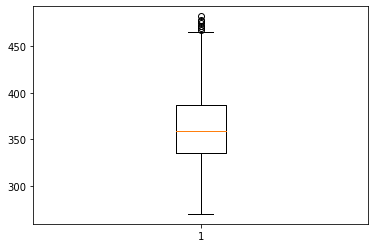

In [7]:
N = 1000
error = 0
results = [experiment(error) for i in range(N)]
# plot.hist(results)
plot.boxplot(results)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f35c1c9c460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f35c1c9cb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f35c1c9c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f35c1ca82e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f35c1ca8670>],
 'means': []}

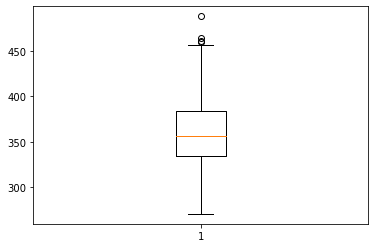

In [8]:
N = 1000
error = 10
results = [experiment(error) for i in range(N)]
# plot.hist(results)
plot.boxplot(results)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f35c1bff760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f35c1bffe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f35c1bff3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f35c1c075e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f35c1c07970>],
 'means': []}

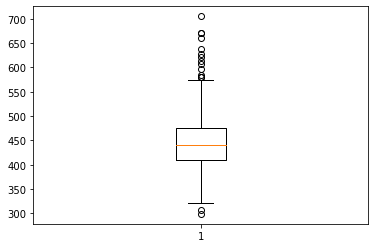

In [9]:
N = 1000
error = 50
results = [experiment(error) for i in range(N)]
# plot.hist(results)
plot.boxplot(results)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f35c1beac40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f35c1bf53a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f35c1bea8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f35c1bf5ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f35c1bf5e50>],
 'means': []}

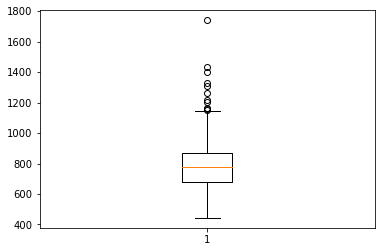

In [10]:
N = 1000
error = 100
results = [experiment(error) for i in range(N)]
# plot.hist(results)
plot.boxplot(results)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f35c19f1130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f35c19f1850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f35c19e2d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f35c19f1f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f35c19fb340>],
 'means': []}

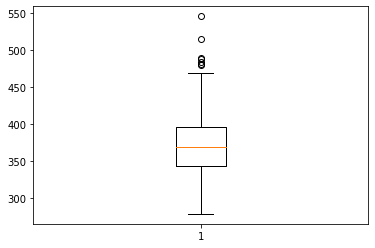

In [15]:
N = 1000
error = 20
results = [experiment(error) for i in range(N)]
# plot.hist(results)
plot.boxplot(results)